In [12]:
#Load the dataset into a NumPy array.
import numpy as np

In [13]:
#Getting the data from dataset and printing it as a matrix.
data = np.genfromtxt('glass.data.csv', delimiter=',')
data = data.astype('float')
print (data)

[[  1.        1.52101  13.64    ...   0.        0.        1.     ]
 [  2.        1.51761  13.89    ...   0.        0.        1.     ]
 [  3.        1.51618  13.53    ...   0.        0.        1.     ]
 ...
 [212.        1.52065  14.36    ...   1.64      0.        7.     ]
 [213.        1.51651  14.38    ...   1.57      0.        7.     ]
 [214.        1.51711  14.23    ...   1.67      0.        7.     ]]


In [14]:
#Define your X (features) and y (labels) matrices and show their dimensionality
X = data[:, 1:10]  
y = data[:, 10]   

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (214, 9)
y shape: (214,)


In [15]:
#Printing the first 5 rows of X
print("First 5 rows of X:")
print(X[:5, :])

First 5 rows of X:
[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]


In [16]:
#Printing the unique no.of values of Y
num_classes = len(np.unique(y))
print("Number of unique values in y:", num_classes)

Number of unique values in y: 6


In [17]:
#Calculate summary statsics: the mean, standard deviaton, minimum, and maximum
mean_values = np.mean(X, axis=0)
std_deviation = np.std(X, axis=0)
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)

print('Mean values for each feature:', mean_values)
print('Standard deviation for each feature:', std_deviation)
print('Minimum values for each feature:', min_values)
print("Maximum values for each feature:", max_values)

Mean values for each feature: [1.51836542e+00 1.34078505e+01 2.68453271e+00 1.44490654e+00
 7.26509346e+01 4.97056075e-01 8.95696262e+00 1.75046729e-01
 5.70093458e-02]
Standard deviation for each feature: [0.00302976 0.81469337 1.43903379 0.49810176 0.77273399 0.65066625
 1.41982447 0.49605617 0.09721077]
Minimum values for each feature: [ 1.51115 10.73     0.       0.29    69.81     0.       5.43     0.
  0.     ]
Maximum values for each feature: [ 1.53393 17.38     4.49     3.5     75.41     6.21    16.19     3.15
  0.51   ]


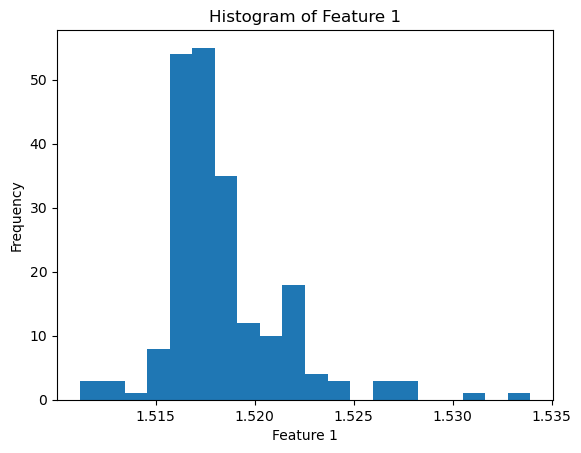

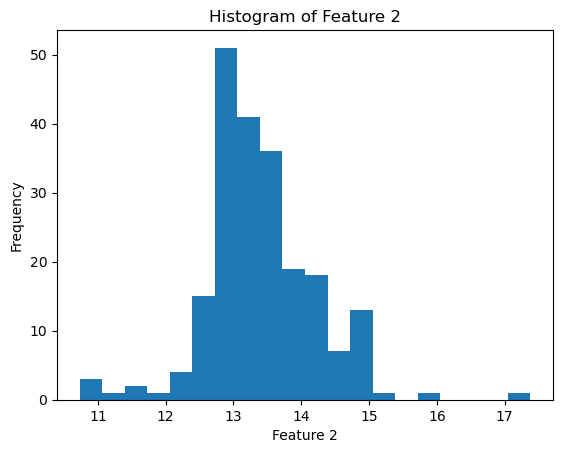

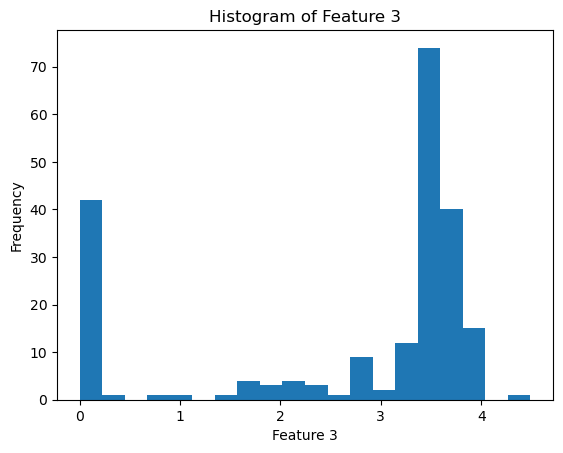

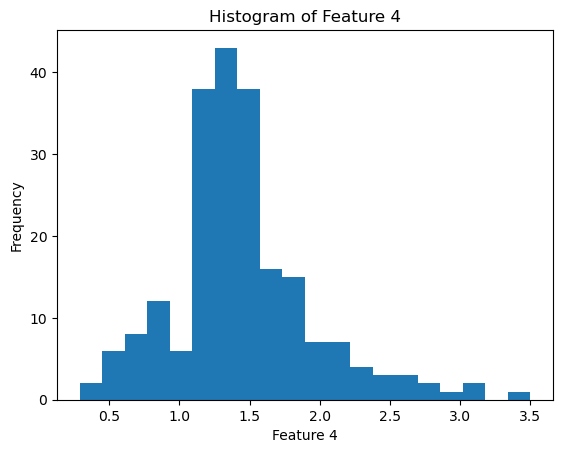

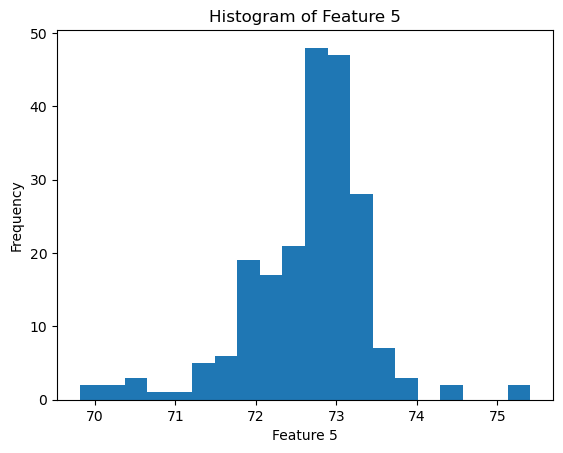

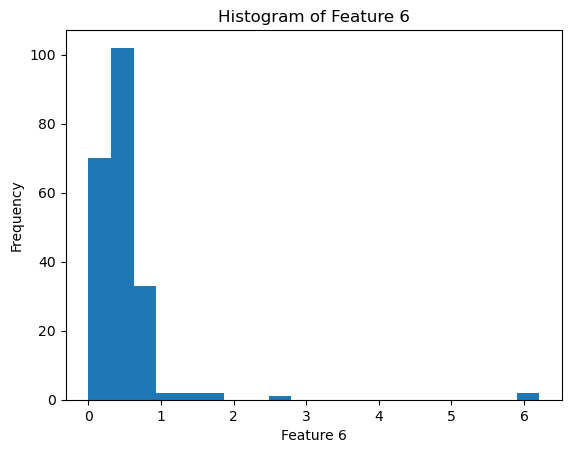

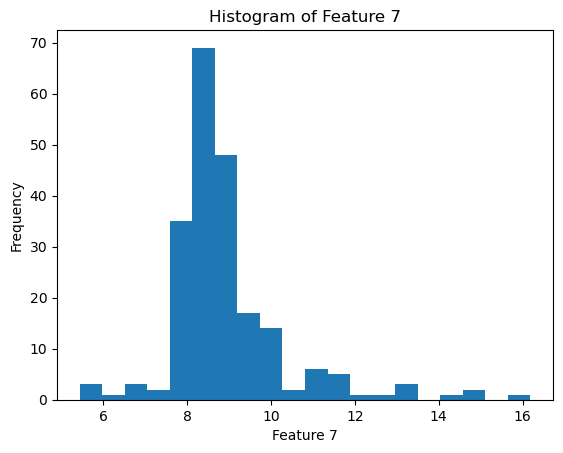

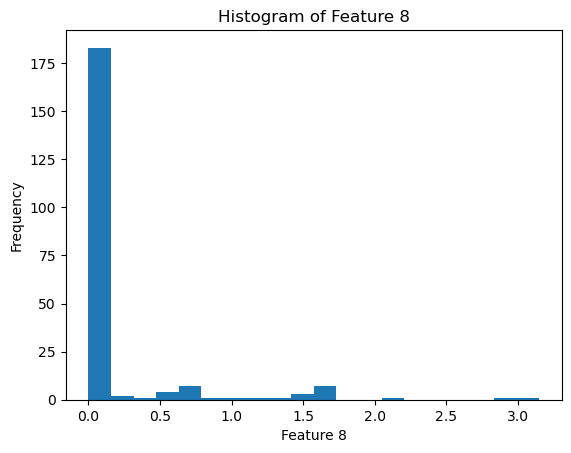

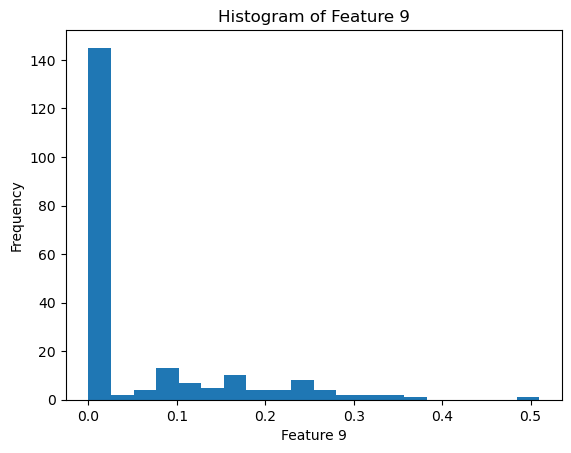

In [18]:
import matplotlib.pyplot as plt

#Plot a histogram for each of the features
for i in range(X.shape[1]):
    plt.hist(X[:, i], bins=20)  # Adjust the number of bins as needed
    plt.xlabel(f"Feature {i + 1}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Feature {i + 1}")
    plt.show()

In [19]:
#Perform normalization/standardization.
from sklearn.preprocessing import StandardScaler



<Figure size 1000x1000 with 0 Axes>

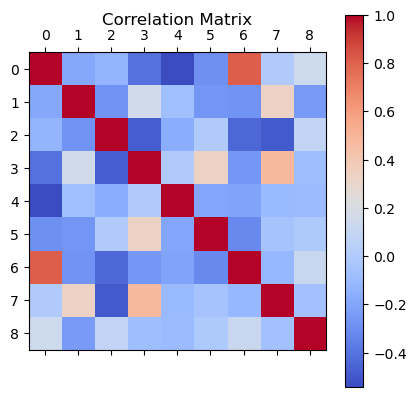

In [20]:
#Calculate the correlation matrix between all the features

cor_matrix = np.corrcoef(X, rowvar=False)
plt.figure(figsize=(10, 10))
cax = plt.matshow(cor_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()

In [21]:
from sklearn.preprocessing import OneHotEncoder
#applying the One-Hot encoder.

encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))
print(y_encoded.shape)

(214, 6)


/Users/nani/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
#Train the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.4,random_state=48)

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
print(X_train.shape)

(128, 9)


In [24]:
#Create a Sequential model with several dense layers. Use appropriate activationfunctions and initalization methods.
import tensorflow as tf
print(tf.__version__)

2.12.0


In [25]:
#Building the model as a sequential model with dense layers.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [26]:
print(len(set(y)))

6


In [27]:
#Use appropriate activationfunctions and initialization methods.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(9,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(set(y)), activation='softmax'))

In [28]:
#Compling the layers
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
#summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,918
Trainable params: 2,918
Non-trainable params: 0
_________________________________________________________________


In [30]:
print(X_scaled.shape)

(128, 9)


In [69]:
#Traing the model
history = model.fit(X_scaled, y_train, epochs=78, batch_size=10, validation_split=0.2)


Epoch 1/78
11/11 [==============================] - 0s 3ms/step - loss: 0.9286 - accuracy: 0.7745 - val_loss: 1.0585 - val_accuracy: 0.7308
Epoch 2/78
11/11 [==============================] - 0s 2ms/step - loss: 0.7268 - accuracy: 0.8333 - val_loss: 1.0324 - val_accuracy: 0.6538
Epoch 3/78
11/11 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.8627 - val_loss: 0.9348 - val_accuracy: 0.6923
Epoch 4/78
11/11 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8529 - val_loss: 0.8637 - val_accuracy: 0.7308
Epoch 5/78
11/11 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.8627 - val_loss: 0.8273 - val_accuracy: 0.7308
Epoch 6/78
11/11 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8627 - val_loss: 0.7640 - val_accuracy: 0.6538
Epoch 7/78
11/11 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8922 - val_loss: 0.7796 - val_accuracy: 0.7308
Epoch 8/78
11/11 [==

11/11 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9706 - val_loss: 0.5738 - val_accuracy: 0.8077
Epoch 60/78
11/11 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9706 - val_loss: 0.5585 - val_accuracy: 0.8077
Epoch 61/78
11/11 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9706 - val_loss: 0.5633 - val_accuracy: 0.8077
Epoch 62/78
11/11 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9706 - val_loss: 0.5787 - val_accuracy: 0.8077
Epoch 63/78
11/11 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9706 - val_loss: 0.5484 - val_accuracy: 0.8077
Epoch 64/78
11/11 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9706 - val_loss: 0.5531 - val_accuracy: 0.8077
Epoch 65/78
11/11 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9706 - val_loss: 0.5726 - val_accuracy: 0.8077
Epoch 66/78
11/11 [======

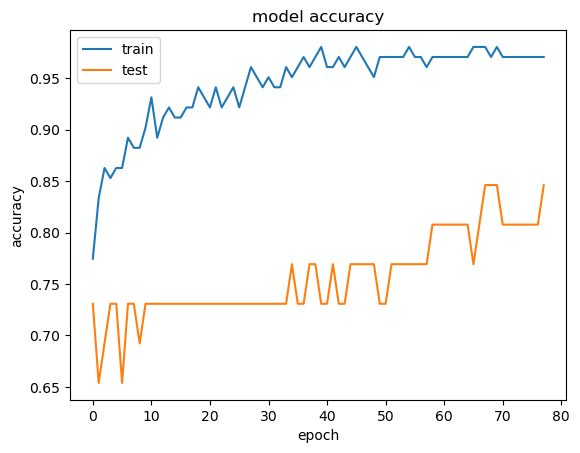

In [70]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


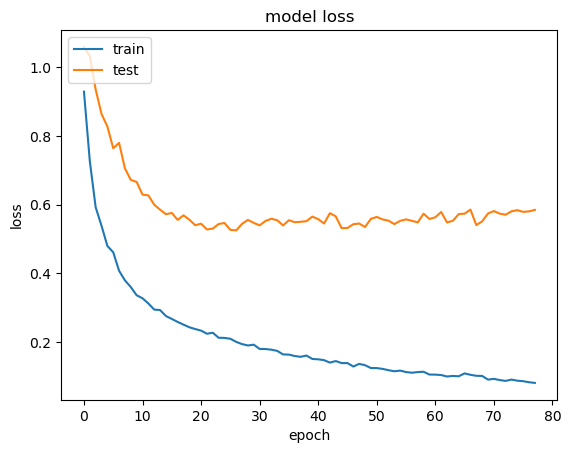

In [71]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [72]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)


3/3 [==============================] - 0s 1ms/step - loss: 61.7654 - accuracy: 0.2442
Test Loss: 61.76536560058594
Test Accuracy: 0.24418604373931885
3/3 [==============================] - 0s 561us/step
(86, 6) (86, 6)


[[21  0  0  0  0  0]
 [34  0  0  0  0  0]
 [ 8  0  0  0  0  0]
 [ 6  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [13  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        21
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        13

    accuracy                           0.24        86
   macro avg       0.04      0.17      0.07        86
weighted avg       0.06      0.24      0.10        86



/Users/nani/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nani/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nani/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

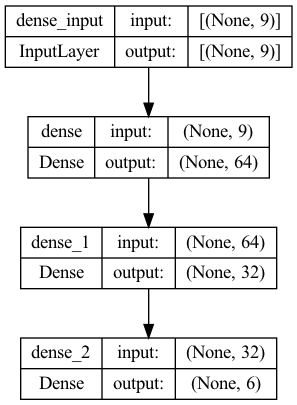

In [73]:
#Plot confusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cm)

cr = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cr)

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


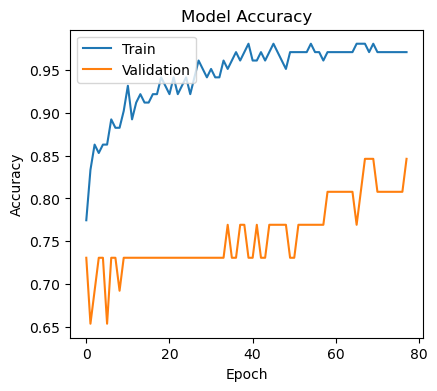

In [74]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')




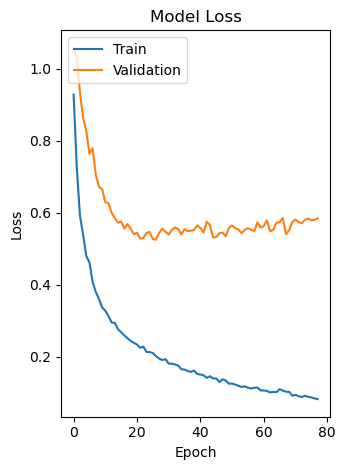

In [75]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [68]:
#In my case from what i know is, the model is overfitting. Overfitting means the "the train loss" is decreasing while the validation should increase or shopuld be the same, in the above case the model which i trained is giving me the the lossses in both training and validation outputs- both are decreasing.

In [ ]:
#When i compared the results when changing the neurons also with epoch values and batch sizes , the values of the losses are getting distant while i vary the epochs and batch sizes.